In [2]:
import pandas as pd
from mutil import *
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datasets

In [3]:
df_delitos, df_camaras = load_data()
df_delitos = preprocess_data(df_delitos, df_camaras)
df_delitos = df_delitos.groupby('id_camara')

In [4]:
""" 
# Find group with most data
max_len = 0
max_id = 0
for id_camara, df in df_delitos:
	if len(df) > max_len:
		max_len = len(df)
		max_id = id_camara

print(max_id, max_len) 
"""

' \n# Find group with most data\nmax_len = 0\nmax_id = 0\nfor id_camara, df in df_delitos:\n\tif len(df) > max_len:\n\t\tmax_len = len(df)\n\t\tmax_id = id_camara\n\nprint(max_id, max_len) \n'

In [5]:
# get group by '1'
df_delitos = df_delitos.get_group('MC3857')
print(len(df_delitos))
df_delitos.head()


284


,fecha_creacion,hora_creacion,incidente_c4,colonia,delegacion_inicio,sector_inicio,latitud,longitud,año_creacion,mes_creacion,dia_creacion,dia_semana,semana_creacion,id_camara
208560,2022-04-05,17:00,Agresión-Persona,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444291,-99.153146,2022,4,5,1,14,MC3857
208561,2022-04-05,14:00,Robo-Establecimiento sin Violencia,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444400,-99.153800,2022,4,5,1,14,MC3857
208562,2022-04-06,21:00,Robo-Establecimiento sin Violencia,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444432,-99.153957,2022,4,6,2,14,MC3857
208563,2022-04-10,15:00,Robo-Establecimiento sin Violencia,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444426,-99.153890,2022,4,10,6,14,MC3857
208564,2022-04-10,04:00,Robo-Transeúnte,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444432,-99.153957,2022,4,10,6,14,MC3857


In [6]:
#split the data into train (whole dates in 2022) and test (whole dates in 2023)
train = df_delitos[df_delitos.fecha_creacion.dt.year == 2022]
test = df_delitos[df_delitos.fecha_creacion.dt.year == 2023]

# Count the number of crimes per day but saving the date and the id_camara
df_delitos_train_count = train.groupby(['id_camara', 'fecha_creacion']).size().reset_index(name='count')
# df_delitos_train_count.head()

# Count the number of crimes per day but saving the date and the id_camara
df_delitos_test_count = test.groupby(['id_camara', 'fecha_creacion']).size().reset_index(name='count')
# df_delitos_test_count.head()

# recorre df_delitos_train_count por los 365 dias del año 2022, donde no hay datos, los rellena con 0 en count
df_delitos_train_count = df_delitos_train_count.set_index('fecha_creacion').reindex(pd.date_range(start='2022-01-01', end='2022-12-31')).reset_index().rename(columns={'index': 'fecha_creacion'})
df_delitos_train_count['count'] = df_delitos_train_count['count'].fillna(0)

# recorre df_delitos_test_count por los 365 dias del año 2023, donde no hay datos, los rellena con 0 en count
df_delitos_test_count = df_delitos_test_count.set_index('fecha_creacion').reindex(pd.date_range(start='2023-01-01', end='2023-01-31')).reset_index().rename(columns={'index': 'fecha_creacion'})
df_delitos_test_count['count'] = df_delitos_test_count['count'].fillna(0)

print(f'Number of observations in train: {len(df_delitos_train_count)} ({(len(df_delitos_train_count)*100/len(df_delitos)):.2f})%')
print(f'Number of observations in test: {len(df_delitos_test_count)} ({(len(df_delitos_test_count)*100/len(df_delitos)):.2f})%')

Number of observations in train: 365 (128.52)%
Number of observations in test: 31 (10.92)%


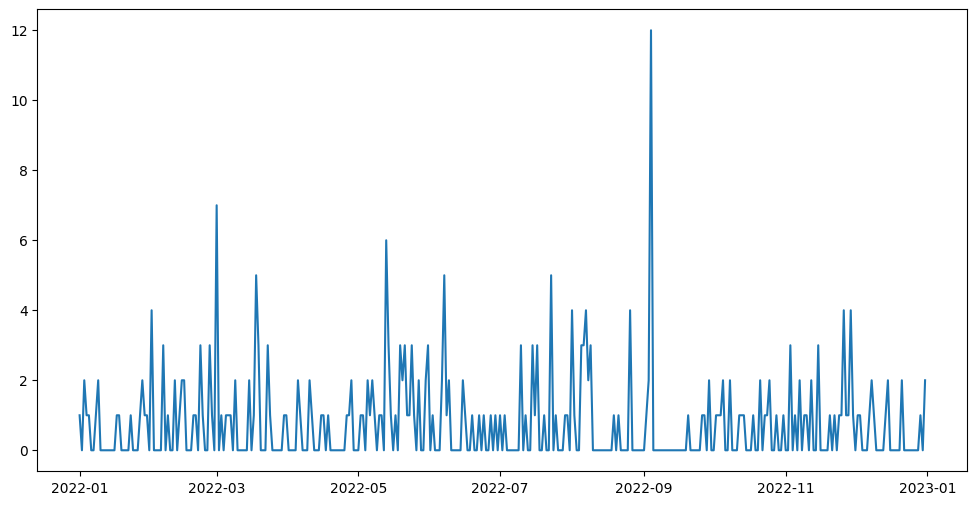

In [7]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_delitos_train_count['fecha_creacion'], df_delitos_train_count['count'], label='Train')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1643.271, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1473.892, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1561.638, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1429.387, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1508.244, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1393.608, Time=0.26 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1435.718, Time=0.11 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1382.330, Time=0.28 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1424.5

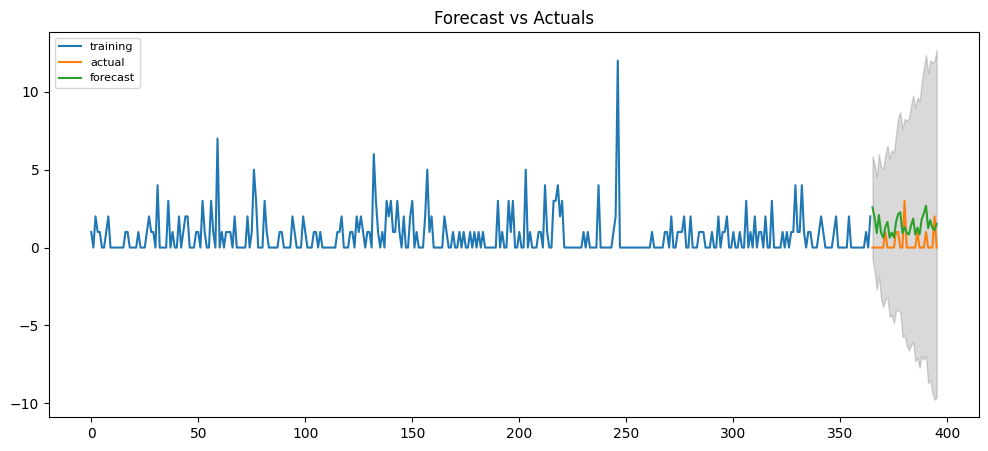

RMSE: 1.4012955727710648


In [45]:
# Análisis estádistico utilizando auto ARIMA
# from pmdarima import auto_arima
from pmdarima.arima import auto_arima

# Split data into train / test sets
train = df_delitos_train_count['count']
test = df_delitos_test_count['count']
# move index of test stating from the end of train
test.index = range(len(train), len(train)+len(test))

# Fit auto_arima function with dep_var 'count' 
stepwise_fit = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# To print the summary
stepwise_fit.summary()

# evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Plot with test data using future data and ploting with specific days

# Forecast
n_periods = len(test)
fc, confint = stepwise_fit.predict(n_periods=n_periods, return_conf_int=True, alpha=0.05)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# Make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index,
                  lower_series,
                  upper_series,
                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, fc))
print(f'RMSE: {rmse}')



In [ ]:
# evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, fc))


In [22]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (7, 1, 0), seasonal_order =(0, 0, 0, 0))
results = model.fit()
results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  365
Model:               SARIMAX(7, 1, 0)   Log Likelihood                -616.641
Date:                Fri, 10 Feb 2023   AIC                           1249.282
Time:                        12:44:21   BIC                           1280.460
Sample:                             0   HQIC                          1261.674
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8300      0.043    -19.391      0.000      -0.914      -0.746
ar.L2         -0.7102      0.059    -12.041      0.000      -0.826      -0.595
ar.L3         -0.6017      0.067     -8.976      0.000      -0.733      -0.470
ar.L4         -0.5378      0.066     -8.148      0.000      -0.667      -0.408
ar.L5         -0.4339      0.061     -7.165      0.000      -0.553      -0.315
ar.L6         -0.2928      0.059     -4.955      0.000      -0.409      -0.177
ar.L7         -0.1336      0.053     -2.541      0.011      -0.237      -0.031
sigma2         1.7275      0.046     37.461      0.000       1.637       1.818
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              5080.80
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             2.86
Prob(H) (two-sided):                  0.03   Kurtosis:                        20.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Análisis estádistico utilizando ARIMA

# To install statsmodels use conda install -c conda-forge statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# To install pmdarima use conda install -c conda-forge pmdarima
from pmdarima import auto_arima 

df_by_delitos = df.groupby('incidente_c4')

for delito, delito_df in df_by_delitos:
	print('delito', delito)

	delito_df_pt = delito_df.groupby('fecha_creacion').count()#['incidente_c4'].to_frame()
	delito_df_pt.rename(columns={'incidente_c4':'obs'}, inplace=True)
	delito_arima_df = delito_df_pt[['obs']]
	print('delito_df_pt', delito_arima_df)
	#print('columns', delito_df_pt.columns)

	#find if one day is missing and print it
	for i in range(len(delito_arima_df)-1):
		if delito_arima_df.index[i+1] - delito_arima_df.index[i] != pd.Timedelta(days=1):
			print('Missing day', delito_arima_df.index[i+1])
			# add missing day
			
			delito_arima_df.loc[delito_arima_df.index[i+1]] = 0
	
	# Create time series and plot
	RT = delito_arima_df.iloc[-678:].astype(float).squeeze().to_numpy()
	RT = pd.Series(RT, index=pd.date_range(start='2022-01-01', end='2022-12-31', freq='D'))
	plt.plot(RT)

NameError: name 'df' is not defined

In [ ]:
# To install statsmodels use conda install -c conda-forge statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# To install pmdarima use conda install -c conda-forge pmdarima
from pmdarima import auto_arima 

# Read RDS file
echoT = pd.read_pickle("C:/Users/lpenac/Documents/SUPERBASES/echo_TOTAL.Rds")

# Filter and group data
RoboTranseunte = (
    echoT.loc[echoT['incidente_c4'] == 'Robo-Transeúnte']
        .groupby(['fecha_cierre', 'incidente_c4'])
        .count()
        .reset_index()
        .drop('incidente_c4', axis=1)
)

# Create date range and join with grouped data
date_range = pd.DataFrame({'fecha_cierre': pd.date_range(start='2021-01-01', end='2023-01-30', freq='D')})
Rob = pd.merge(date_range, RoboTranseunte, on='fecha_cierre', how='left')
Rob.fillna(0, inplace=True)
Rob.rename(columns={'n': 'obs'}, inplace=True)
Rob = Rob.drop('fecha_cierre', axis=1)

# Create time series and plot
RT = Rob.iloc[-678:].astype(float).squeeze().to_numpy()
RT = pd.Series(RT, index=pd.date_range(start='2021-03-01', end='2023-01-30', freq='D'))
plt.plot(RT)

# ADF test
result = adfuller(RT)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot ACF and PACF
plot_acf(RT, lags=365)
plot_pacf(RT, lags=365)

# Model 1
model1 = ARIMA(RT, order=(1, 0, 1))
model1 = model1.fit()
print(model1.summary())
residuals = model1.resid

# Model 2
model2 = ARIMA(RT, order=(7, 0, 7))
model2 = model2.fit()
print(model2.summary())
residuals = model2.resid

# Forecast with Model 2
forecast = model2.forecast(steps=5)
print(forecast)

# Auto ARIMA
auto = auto_arima(RT, seasonal=False, suppress_warnings=True)
print(auto.summary())

# Model 3
model3 = ARIMA(RT, order=auto.order)
model3 = model3.fit()
print(model3.summary())
residuals = model3
